In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
import re

In [2]:
df_hits = pd.read_csv('df_hits_clean.csv')

In [3]:
df_sessions = pd.read_csv('df_sessions_clean.csv')

C:\Users\derna\AppData\Local\Temp\ipykernel_12476\2978817895.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('df_sessions_clean.csv')


# –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑

## 1. –û—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–π —Ç—Ä–∞—Ñ–∏–∫ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –ø–ª–∞—Ç–Ω–æ–≥–æ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è CR (Conversion Rate) –≤ —Ü–µ–ª–µ–≤—ã–µ —Å–æ–±—ã—Ç–∏—è.

–ì–∏–ø–æ—Ç–µ–∑–∞ 1

–û—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–π —Ç—Ä–∞—Ñ–∏–∫ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –ø–ª–∞—Ç–Ω–æ–≥–æ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è CR
(Conversion Rate) –≤ —Ü–µ–ª–µ–≤—ã–µ —Å–æ–±—ã—Ç–∏—è.

H0 (–Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞): CR –≤ –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–æ–º –∏ –ø–ª–∞—Ç–Ω–æ–º —Ç—Ä–∞—Ñ–∏–∫–µ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π.

H1 (–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞): CR –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è.

–ï—Å–ª–∏ p-value < 0.05 ‚Üí —Ä–∞–∑–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ

In [10]:
#–°–æ–∑–¥–∞–¥–∏–º –∫–æ–ª–æ–Ω–∫—É is_target, –≤ –∫–æ—Ç–æ—Ä–æ–π —É–∫–∞–∂–µ–º –±—ã–ª–æ –ª–∏ —Å–æ–≤–µ—Ä—à–µ–Ω–æ —Ü–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ(1-—Å–æ–≤–µ—Ä—à–µ–Ω–æ, 0-–Ω–µ —Å–æ–≤–µ—Ä—à–µ–Ω–æ)

In [12]:
target_events = [
    'sub_car_claim_click',
    'sub_car_claim_submit_click',
    'sub_open_dialog_click',
    'sub_custom_question_submit_click',
    'sub_call_number_click',
    'sub_callback_submit_click',
    'sub_submit_success',
    'sub_car_request_submit_click'
]

df_hits['is_target'] = df_hits['event_action'].isin(target_events).astype(int)

In [13]:
df_hits['is_target'].value_counts(dropna=False)

is_target
0    15621562
1      104908
Name: count, dtype: int64

–î–æ–±–∞–≤–∏–º –∫–æ–ª–æ–Ω–∫—É traffic_type –≤–æ —Ñ—Ä–µ–π–º sessions –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–∏–ø–∞ —Ç—Ä–∞—Ñ–∏–∫–∞

In [18]:
#–æ—Ç–¥–µ–ª—å–Ω–æ –≤—ã–Ω–æ—Å–∏–º —Å—Ç—Ä–æ–∫–∏ —Å is_target=1
converted_sessions = df_hits.groupby('session_id')['is_target'].max().reset_index()

# –ü–æ–º–µ—á–∞–µ–º —Ç–∏–ø —Ç—Ä–∞—Ñ–∏–∫–∞: –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–π –∏–ª–∏ –ø–ª–∞—Ç–Ω—ã–π
organic_mediums = ['organic', 'referral', '(none)']
df_sessions['traffic_type'] = df_sessions['utm_medium'].apply(
    lambda x: 'organic' if x in ['organic', 'referral', '(none)'] else ('paid' if x != 'other' else 'unknown'))

In [19]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å–µ—Å—Å–∏–∏ —Å —Ñ–ª–∞–≥–∞–º–∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–π
df_combined = pd.merge(df_sessions, converted_sessions, on='session_id', how='left')
df_combined['is_target'] = df_combined['is_target'].fillna(0).astype(int)

In [20]:
# –°—á–∏—Ç–∞–µ–º CR –ø–æ —Ç–∏–ø—É —Ç—Ä–∞—Ñ–∏–∫–∞
cr_by_traffic_type = df_combined.groupby('traffic_type')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()

cr_by_traffic_type['conversion_rate'] = cr_by_traffic_type['conversions'] / cr_by_traffic_type['total_sessions']
print(cr_by_traffic_type)

  traffic_type  conversions  total_sessions  conversion_rate
0      organic        20812          515659         0.040360
1         paid        29502         1344383         0.021945


In [21]:
paid = df_combined[df_combined['traffic_type'] == 'paid']['is_target'].reset_index(drop=True)
organic = df_combined[df_combined['traffic_type'] == 'organic']['is_target'].reset_index(drop=True)

# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π paid –∏ organic —Ä–∞–∑–Ω–æ–µ, –≤–æ–∑—å–º–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª–∏–Ω—ã, —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –¥–≤–µ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –≤—ã–±–æ—Ä–∫–∏
min_len = min(len(paid), len(organic))

paid = paid[:min_len]
organic = organic[:min_len]

df_split = pd.DataFrame({
    'paid_is_target': paid,
    'organic_is_target': organic
})

In [22]:
#—Ç–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –ø–ª–æ—Ö–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö. –ü—Ä–∏–º–µ–Ω–∏–º Kolmogorov‚ÄìSmirnov test 
ks_stat, ks_pval = kstest(df_split['organic_is_target'], 'uniform')

print("Kolmogorov-Smirnov Test:")
print(f"Statistic: {ks_stat}, p-value: {ks_pval}")

ks_stat1, ks_pval1 = kstest(df_split['paid_is_target'], 'uniform')

print("Kolmogorov-Smirnov Test:")
print(f"Statistic: {ks_stat1}, p-value: {ks_pval1}")

Kolmogorov-Smirnov Test:
Statistic: 0.9596399946476256, p-value: 0.0
Kolmogorov-Smirnov Test:
Statistic: 0.9783810619033121, p-value: 0.0


–í—ã–±–æ—Ä–∫–∏ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ. –ü–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å –ö—Ä–∏—Ç–µ—Ä–∏–π –ú–∞–Ω–Ω–∞_–£–∏—Ç–Ω–∏, –∞ —Ç–∞–∫–∂–µ Z-—Ç–µ—Å—Ç –¥–ª—è –ø—Ä–æ–ø–æ—Ä—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–π –ª—É—á—à–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —á–∞—Å—Ç–æ—Ç—ã –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —É—Å–ø–µ—Ö–∞ (1)

In [24]:
stat, pval = stats.mannwhitneyu(df_split['paid_is_target'], df_split['organic_is_target'])
print(f"U-statistic: {stat}, p-value: {pval}")

U-statistic: 130460437852.5, p-value: 0.0


In [25]:
successes = [df_split['paid_is_target'].sum(), df_split['organic_is_target'].sum()]

nobs = [len(df_split['paid_is_target']), len(df_split['organic_is_target'])]

stat, pval = proportions_ztest(successes, nobs)

print(f"Z-statistic: {stat}, p-value: {pval}")

Z-statistic: -54.91478506435708, p-value: 0.0


___p-value –º–µ–Ω—å—à–µ 0.05, –æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –¥–æ–ª–∏ —É—Å–ø–µ—Ö–∞ –≤ –¥–≤—É—Ö –≥—Ä—É–ø–ø–∞—Ö —Ä–∞–≤–Ω—ã___

—Å–¥–µ–ª–∞–µ–º –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é, –≥–¥–µ –ø–æ—Å–º–æ—Ç—Ä–µ–º –Ω–∞ –¥–æ–ª–∏ —É—Å–ø–µ—Ö–∞ –∫ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø–æ–ø—ã—Ç–æ–∫

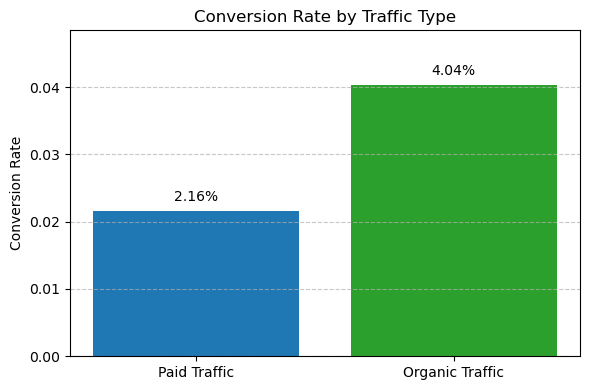

In [36]:
paid_conversion_rate = df_split['paid_is_target'].mean()
organic_conversion_rate = df_split['organic_is_target'].mean()

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–∞
conversion_rates = [paid_conversion_rate, organic_conversion_rate]
labels = ['Paid Traffic', 'Organic Traffic']

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å—Ç–æ–ª–±—á–∞—Ç–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, conversion_rates, color=['#1f77b4', '#2ca02c'])

# –ü–æ–¥–ø–∏—Å–∏ –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')

plt.title('Conversion Rate by Traffic Type')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(conversion_rates) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

CR –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–æ–≥–æ —Ç—Ä–∞—Ñ–∏–∫–∞ –ø–æ—á—Ç–∏ –≤ 2 —Ä–∞–∑–∞ –≤—ã—à–µ. –ü–ª–∞—Ç–Ω—ã–π —Ç—Ä–∞—Ñ–∏–∫ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–æ–≥–æ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è CR

## 2. –¢—Ä–∞—Ñ–∏–∫ —Å –º–æ–±–∏–ª—å–Ω—ã—Ö —É—Å—Ç—Ä–æ–π—Å—Ç–≤ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç —Ç—Ä–∞—Ñ–∏–∫–∞ —Å –¥–µ—Å–∫—Ç–æ–ø–Ω—ã—Ö —É—Å—Ç—Ä–æ–π—Å—Ç–≤ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è CR (Conversion Rate) –≤ —Ü–µ–ª–µ–≤—ã–µ —Å–æ–±—ã—Ç–∏—è.

In [40]:
df_sessions['device_category'].unique()

array(['mobile', 'tablet', 'desktop'], dtype=object)

In [42]:
# –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ tablet –∏ mobile –æ–±—ä–µ–¥–µ–Ω—è–µ–º, —Ç –∫ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –¥–ª—è –Ω–∞—Å —ç—Ç–æ –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ

In [44]:
df_temp = df_combined.copy()

df_temp['device_group'] = df_temp['device_category'].apply(
    lambda x: 'desktop' if x in ['desktop'] else 'mobile')

In [45]:
cr_by_device_type = df_temp.groupby('device_group')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()

cr_by_device_type['conversion_rate'] = cr_by_device_type['conversions'] / cr_by_device_type['total_sessions']
print(cr_by_device_type)

  device_group  conversions  total_sessions  conversion_rate
0      desktop        11513          366863         0.031382
1       mobile        38801         1493179         0.025985


In [205]:
#—Å–¥–µ–ª–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è —Å–æ–∑–¥–∞–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è. –°—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –±—É–¥–µ–º CR –ø–æ –∫–∞–∂–¥–æ–º—É –∫–∞–ª–µ–Ω–¥–∞—Ä–Ω–æ–º—É –¥–Ω—é

In [48]:
def generate_df_for_ttest(df, attribute):

    df_all = df.groupby(['visit_date']).agg({'session_id': 'nunique'}).reset_index()

    df_true = df.loc[df[attribute] == True].groupby(['visit_date']).agg({'is_target': 'sum', 'session_id': 'nunique'}).reset_index()

    df_true['cr_true'] = 100 * df_true['is_target'] / df_true['session_id']

    df_true = df_true.drop(columns=['is_target', 'session_id'])

    

    df_false = df.loc[df[attribute] == False].groupby(['visit_date']).agg({'is_target': 'sum', 'session_id': 'nunique'}).reset_index()

    df_false['cr_false'] = 100 * df_false['is_target'] / df_false['session_id']

    df_false = df_false.drop(columns=['is_target', 'session_id'])

    

    df_all = df_all.merge(df_true, how='left', on='visit_date')

    df_all = df_all.merge(df_false, how='left', on='visit_date')

    df_all = df_all.drop(columns=['session_id']).reset_index(drop=True)

    return df_all

In [52]:
df_temp['is_mobile'] = df_temp['device_group'] == 'mobile'

In [54]:
df_mobile_dist = generate_df_for_ttest(df_temp, 'is_mobile')

In [207]:
#–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ –ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –¥–∞–Ω–Ω—ã–µ.

In [55]:
df_mobile_dist = df_mobile_dist.dropna(subset=['cr_true', 'cr_false'])

print("Kolmogorov-Smirnov Test:")
ks_stat, ks_p = kstest(df_mobile_dist['cr_true'], df_mobile_dist['cr_false'])
print(f"KS-—Ç–µ—Å—Ç: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {ks_stat:.4f}, p-value = {ks_p:.4f}")

Kolmogorov-Smirnov Test:
KS-—Ç–µ—Å—Ç: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 0.1062, p-value = 0.1564


In [211]:
#p > 0.05, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º. –ü—Ä–æ–≤–µ—Ä–∏–º –¥–∏—Å–ø–µ—Ä—Å–∏–∏.

In [56]:
levene_stat, levene_p = stats.levene(df_mobile_dist['cr_true'], df_mobile_dist['cr_false'])

print(f"–¢–µ—Å—Ç –õ–µ–≤–µ–Ω–∞: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {levene_stat:.4f}, p-value = {levene_p:.4f}")

–¢–µ—Å—Ç –õ–µ–≤–µ–Ω–∞: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 20.7936, p-value = 0.0000


In [209]:
#–î–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è. –ü—Ä–æ–≤–µ–¥–µ–º t-—Ç–µ—Å—Ç –£—ç–ª—á–∞

df_mobile_dist = df_mobile_dist.dropna(subset=['cr_true', 'cr_false'])

stat, p_value = stats.ttest_ind(df_mobile_dist['cr_true'], df_mobile_dist['cr_false'], equal_var=False)

print(f"–¢-–∫—Ä–∏—Ç–µ—Ä–∏–π –£—ç–ª—á–∞: t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {stat:.4f}, p-value = {p_value:.4f}")

–¢-–∫—Ä–∏—Ç–µ—Ä–∏–π –£—ç–ª—á–∞: t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = -2.6606, p-value = 0.0081


–¢–∞–∫ –∫–∞–∫ p-value = 0.0081 < 0.05, –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É.

–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–π –≤ –≥—Ä—É–ø–ø–∞—Ö cr_true –∏ cr_false —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è.

–î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ.

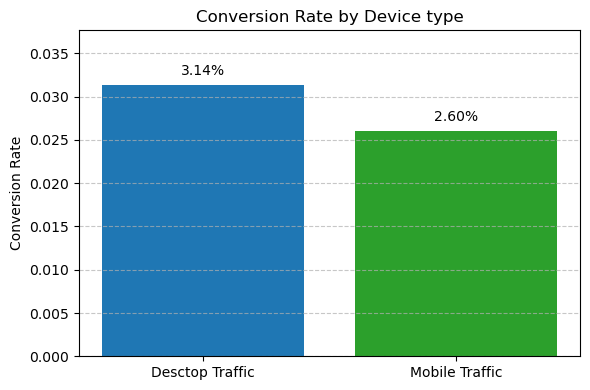

In [217]:
desc_conversion_rate = cr_by_device_type['conversion_rate'][0]
mob_conversion_rate = cr_by_device_type['conversion_rate'][1]

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–∞
conversion_rates = [desc_conversion_rate, mob_conversion_rate]
labels = ['Desctop Traffic', 'Mobile Traffic']

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å—Ç–æ–ª–±—á–∞—Ç–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, conversion_rates, color=['#1f77b4', '#2ca02c'])

# –ü–æ–¥–ø–∏—Å–∏ –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')

plt.title('Conversion Rate by Device type')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(conversion_rates) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

## 3. –¢—Ä–∞—Ñ–∏–∫ –∏–∑ –≥–æ—Ä–æ–¥–æ–≤ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–∏—è (–ú–æ—Å–∫–≤–∞ –∏ –æ–±–ª–∞—Å—Ç—å, –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥) –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç —Ç—Ä–∞—Ñ–∏–∫–∞ –∏–∑ –∏–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è CR (Conversion Rate) –≤ —Ü–µ–ª–µ–≤—ã–µ —Å–æ–±—ã—Ç–∏—è.

In [72]:
df_combined['geo_country'].value_counts(dropna=False)

geo_country
Russia                 1800565
United States            11784
Ukraine                   9012
Ireland                   4034
Belarus                   3636
                        ...   
Zambia                       1
Malawi                       1
R√©union                      1
Barbados                     1
Congo - Brazzaville          1
Name: count, Length: 166, dtype: int64

In [74]:
#–û—Å—Ç–∞–≤–∏–º –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã —Ç–æ–ª—å–∫–æ –†–æ—Å—Å–∏—é

In [76]:
df_russia = df_combined[df_combined['geo_country'] == 'Russia']

In [78]:
df_russia['geo_city'].value_counts(dropna=False)

geo_city
Moscow                        805329
Saint Petersburg              296788
(not set)                      70021
Yekaterinburg                  35788
Krasnodar                      32243
                               ...  
Menzelinsk                         1
Slavyanka                          1
Aleksandrovsk-Sakhalinskiy         1
9992                               1
Beslan                             1
Name: count, Length: 506, dtype: int64

In [80]:
df_rus = df_russia.copy()

df_rus['region_group'] = df_rus['geo_city'].apply(
    lambda x: 'Moscow_SpB' if x in ['Moscow', 'Saint Petersburg'] else 'Regions')

In [81]:
cr_by_region = df_rus.groupby('region_group')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()

cr_by_region['conversion_rate'] = cr_by_region['conversions'] / cr_by_region['total_sessions']
print(cr_by_region)

  region_group  conversions  total_sessions  conversion_rate
0   Moscow_SpB        30742         1102117         0.027894
1      Regions        18414          698448         0.026364


In [82]:
df_rus['is_moscow'] = df_rus['region_group'] == 'Moscow_SpB'

In [85]:
df_region_dist = generate_df_for_ttest(df_rus, 'is_moscow')

In [87]:
df_region_dist = df_region_dist.dropna(subset=['cr_true', 'cr_false'])

print("Kolmogorov-Smirnov Test:")
ks_stat, ks_p = kstest(df_region_dist['cr_true'], df_region_dist['cr_false'])
print(f"KS-—Ç–µ—Å—Ç: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {ks_stat:.4f}, p-value = {ks_p:.4f}")

Kolmogorov-Smirnov Test:
KS-—Ç–µ—Å—Ç: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 0.1372, p-value = 0.0284


In [88]:
# –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H0): –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–π (CR) —É —Ç—Ä–∞—Ñ–∏–∫–∞ –∏–∑ –ú–æ—Å–∫–≤—ã –∏ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ –∏ —Ç—Ä–∞—Ñ–∏–∫–∞ –∏–∑ –¥—Ä—É–≥–∏—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ –æ–¥–∏–Ω–∞–∫–æ–≤—ã.
# –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H1): –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ–Ω–≤–µ—Ä—Å–∏–π —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è.

stat, p_value = stats.mannwhitneyu(df_region_dist['cr_true'], df_region_dist['cr_false'], alternative='two-sided')

print(f"–ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {stat:.4f}, p-value = {p_value:.4f}")

–ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 26428.0000, p-value = 0.5218


–¢–∞–∫ –∫–∞–∫ p-value = 0.5218 > 0.05, –º—ã –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É.

–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ cr_true –∏ cr_false –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –∏—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º–∏.

–°–¥–µ–ª–∞–µ–º –∏ –∑–¥–µ—Å—å –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é.

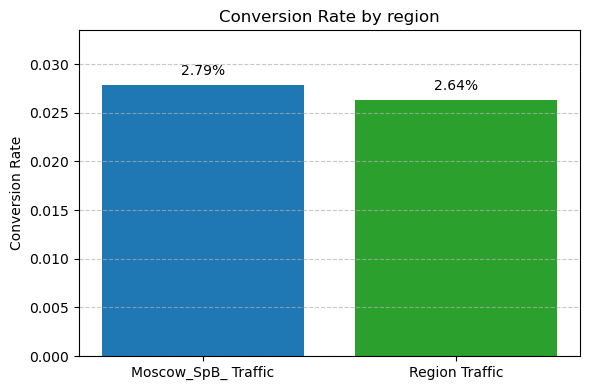

In [103]:
moscow_conversion_rate = cr_by_region['conversion_rate'][0]
region_conversion_rate = cr_by_region['conversion_rate'][1]

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–∞
conversion_rates = [moscow_conversion_rate, region_conversion_rate]
labels = ['Moscow_SpB_ Traffic', 'Region Traffic']

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å—Ç–æ–ª–±—á–∞—Ç–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, conversion_rates, color=['#1f77b4', '#2ca02c'])

# –ü–æ–¥–ø–∏—Å–∏ –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')

plt.title('Conversion Rate by region')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(conversion_rates) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# –û—Ç–≤–µ—Ç—ã –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã –ø—Ä–æ–¥—É–∫—Ç–æ–≤–æ–π –∫–æ–º–ø–∞–Ω–∏–∏

## 1. –ò–∑ –∫–∞–∫–∏—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ (–∫–∞–º–ø–∞–Ω–∏–π, —É—Å—Ç—Ä–æ–π—Å—Ç–≤, –ª–æ–∫–∞—Ü–∏–π) –∫ –Ω–∞–º –∏–¥—ë—Ç —Å–∞–º—ã–π —Ü–µ–ª–µ–≤–æ–π —Ç—Ä–∞—Ñ–∏–∫ (–∏ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –æ–±—ä—ë–º–∞ —Ç—Ä–∞—Ñ–∏–∫–∞, –∏ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è CR)?

In [95]:
#–ë—Ä–∞—Ç—å –∫ —Ä–∞—Å—á–µ—Ç—É CR –¥–∞–Ω–Ω—ã–µ –±—É–¥–µ–º —Ç–µ, –≥–¥–µ total_sessions –±–æ–ª–µ–µ 3000

In [97]:
#–†–∞—Å—á—ë—Ç CR –ø–æ –∫–∞–º–ø–∞–Ω–∏—è–º
cr_by_campaign = df_combined.groupby('utm_campaign')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()
filtered_cr_by_camp = cr_by_campaign[cr_by_campaign['total_sessions'] > 3000]
filtered_cr_by_camp['conversion_rate'] = filtered_cr_by_camp['conversions'] / filtered_cr_by_camp['total_sessions']

#–†–∞—Å—á—ë—Ç CR –ø–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞–º (mobile, desktop, tablet)
cr_by_device = df_combined.groupby('device_category')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()
filtered_cr_by_device = cr_by_device[cr_by_device['total_sessions'] > 3000]
filtered_cr_by_device['conversion_rate'] = filtered_cr_by_device['conversions'] / filtered_cr_by_device['total_sessions']

#–†–∞—Å—á—ë—Ç CR –ø–æ –ª–æ–∫–∞—Ü–∏—è–º (–≥–æ—Ä–æ–¥–∞ –†–æ—Å—Å–∏–∏)
cr_by_location = df_combined.groupby('geo_city')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()
filtered_cr_by_location = cr_by_location[cr_by_location['total_sessions'] > 3000]
filtered_cr_by_location['conversion_rate'] = filtered_cr_by_location['conversions'] / filtered_cr_by_location['total_sessions']

C:\Users\derna\AppData\Local\Temp\ipykernel_12476\3611829325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cr_by_camp['conversion_rate'] = filtered_cr_by_camp['conversions'] / filtered_cr_by_camp['total_sessions']
C:\Users\derna\AppData\Local\Temp\ipykernel_12476\3611829325.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cr_by_location['conversion_rate'] = filtered_cr_by_location['conversions'] / filtered_cr_by_location['total_sessions']


In [182]:
top3_campaign_by_volume = cr_by_campaign.sort_values('total_sessions', ascending=False).head(3)
top3_device_by_volume = cr_by_device.sort_values('total_sessions', ascending=False).head(3)
top3_location_by_volume = cr_by_location.sort_values('total_sessions', ascending=False).head(3)

top3_campaign_by_cr = filtered_cr_by_camp.sort_values('conversion_rate', ascending=False).head(3)
top3_device_by_cr = filtered_cr_by_device.sort_values('conversion_rate', ascending=False).head(3)
top3_location_by_cr = filtered_cr_by_location.sort_values('conversion_rate', ascending=False).head(3)

In [185]:
print("üî• –¢–æ–ø-3 –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –æ–±—ä–µ–º–æ–º —Ç—Ä–∞—Ñ–∏–∫–∞ (–ø–æ total_sessions):")
print("_________________________")
print("üéØ –¢–æ–ø-3 –ø–æ –∫–∞–º–ø–∞–Ω–∏—è–º:")
print(top3_campaign_by_volume[['utm_campaign', 'total_sessions']])
print("_________________________")
print("üéØ –¢–æ–ø-3 –ø–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞–º:")
print(top3_device_by_volume[['device_category', 'total_sessions']])
print("_________________________")
print("üéØ –¢–æ–ø-3 –ø–æ –ª–æ–∫–∞—Ü–∏—è–º:")
print(top3_location_by_volume[['geo_city', 'total_sessions']])

print("______________________________________________________")
print("\nüî• –¢–æ–ø-3 –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º Conversion Rate (CR):")
print("_________________________")
print("üéØ –¢–æ–ø-3 –ø–æ –∫–∞–º–ø–∞–Ω–∏—è–º:")
print(top3_campaign_by_cr[['utm_campaign', 'conversion_rate']])
print("_________________________")
print("üéØ –¢–æ–ø-3 –ø–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞–º:")
print(top3_device_by_cr[['device_category', 'conversion_rate']])
print("_________________________")
print("üéØ –¢–æ–ø-3 –ø–æ –ª–æ–∫–∞—Ü–∏—è–º:")
print(top3_location_by_cr[['geo_city', 'conversion_rate']])

üî• –¢–æ–ø-3 –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –æ–±—ä–µ–º–æ–º —Ç—Ä–∞—Ñ–∏–∫–∞ (–ø–æ total_sessions):
_________________________
üéØ –¢–æ–ø-3 –ø–æ –∫–∞–º–ø–∞–Ω–∏—è–º:
            utm_campaign  total_sessions
88  LTuZkdKfxRGVceoWkVyg          463481
85  LEoPHuyFvzoNfnzGgfcd          324044
40  FTjNLDyTrXaWYgZymFkV          247360
_________________________
üéØ –¢–æ–ø-3 –ø–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞–º:
  device_category  total_sessions
1          mobile         1474871
0         desktop          366863
2          tablet           18308
_________________________
üéØ –¢–æ–ø-3 –ø–æ –ª–æ–∫–∞—Ü–∏—è–º:
              geo_city  total_sessions
1434            Moscow          805329
1930  Saint Petersburg          296788
1            (not set)           78172
______________________________________________________

üî• –¢–æ–ø-3 –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º Conversion Rate (CR):
_________________________
üéØ –¢–æ–ø-3 –ø–æ –∫–∞–º–ø–∞–Ω–∏—è–º:
             utm_campaign  conver

___–í—ã–≤–æ–¥—ã:___

1. –¢–æ–ø-3 –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –æ–±—ä—ë–º–æ–º —Ç—Ä–∞—Ñ–∏–∫–∞ (–ø–æ total_sessions)
–ö–∞–º–ø–∞–Ω–∏–∏:

___LTuZkdKfxRGVceoWkVyg (463,481 —Å–µ—Å—Å–∏–π)___ ‚Äî –∫–∞–º–ø–∞–Ω–∏—è —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å–µ—Å—Å–∏–π, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –æ–Ω–∞ –ø—Ä–∏–≤–ª–µ–∫–ª–∞ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

___LEoPHuyFvzoNfnzGgfcd (324,044 —Å–µ—Å—Å–∏–π)___ ‚Äî —Å–ª–µ–¥—É—é—â–∞—è –ø–æ –≤–µ–ª–∏—á–∏–Ω–µ –∫–∞–º–ø–∞–Ω–∏—è, –∫–æ—Ç–æ—Ä–∞—è —Ç–∞–∫–∂–µ –ø—Ä–∏–≤–ª–µ–∫–ª–∞ –º–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

___FTjNLDyTrXaWYgZymFkV (247,360 —Å–µ—Å—Å–∏–π)___ ‚Äî –µ—â—ë –æ–¥–Ω–∞ –∫–∞–º–ø–∞–Ω–∏—è —Å –±–æ–ª—å—à–∏–º –æ–±—ä—ë–º–æ–º —Ç—Ä–∞—Ñ–∏–∫–∞.

–£—Å—Ç—Ä–æ–π—Å—Ç–≤–∞:

___Mobile (1,474,871 —Å–µ—Å—Å–∏–π)___ ‚Äî –º–æ–±–∏–ª—å–Ω—ã–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –Ω–∞–∏–±–æ–ª—å—à—É—é —á–∞—Å—Ç—å —Ç—Ä–∞—Ñ–∏–∫–∞, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –æ–±—â—É—é —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é —Ä–æ—Å—Ç–∞ –º–æ–±–∏–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞.

___Desktop (366,863 —Å–µ—Å—Å–∏–π)___ ‚Äî —Ç—Ä–∞—Ñ–∏–∫ —Å –¥–µ—Å–∫—Ç–æ–ø–Ω—ã—Ö —É—Å—Ç—Ä–æ–π—Å—Ç–≤ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ, –Ω–æ –≤—Å—ë –µ—â—ë –∑–Ω–∞—á–∏—Ç–µ–ª–µ–Ω.

___Tablet (18,308 —Å–µ—Å—Å–∏–π)___ ‚Äî —Ç—Ä–∞—Ñ–∏–∫ —Å –ø–ª–∞–Ω—à–µ—Ç–æ–≤ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –º–æ–±–∏–ª—å–Ω—ã–º–∏ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞–º–∏ –∏ –¥–µ—Å–∫—Ç–æ–ø–∞–º–∏.

–õ–æ–∫–∞—Ü–∏–∏ (–≥–æ—Ä–æ–¥–∞):

___Moscow (805 329 —Å–µ—Å—Å–∏–π)___ ‚Äî –ú–æ—Å–∫–≤–∞ —è–≤–ª—è–µ—Ç—Å—è –∫—Ä—É–ø–Ω–µ–π—à–∏–º –∏—Å—Ç–æ—á–Ω–∏–∫–æ–º —Ç—Ä–∞—Ñ–∏–∫–∞.

___Saint Petersburg (296 788 —Å–µ—Å—Å–∏–π)___ ‚Äî —Ç—Ä–∞—Ñ–∏–∫ –∏–∑ –°–ü–ë –Ω–∞–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ, —á–µ–º –∏–∑ –ú–æ—Å–∫–≤—ã.

___(not set) (78172 —Å–µ—Å—Å–∏–π)___ ‚Äî –°–µ—Å—Å–∏–π –≥–¥–µ –≥–æ—Ä–æ–¥ –Ω–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–Ω–æ–≥–æ.

–í—ã–≤–æ–¥—ã:

–ú–æ–±–∏–ª—å–Ω—ã–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –∏ –†–æ—Å—Å–∏—è ‚Äî –≥–ª–∞–≤–Ω—ã–µ –∏—Å—Ç–æ—á–Ω–∏–∫–∏ —Ç—Ä–∞—Ñ–∏–∫–∞, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Ç—Ä–µ–Ω–¥ –Ω–∞ –º–æ–±–∏–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ –≤—ã—Å–æ–∫—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ –†–æ—Å—Å–∏–∏.

–ö–∞–º–ø–∞–Ω–∏–∏ —Å –±–æ–ª—å—à–∏–º –æ–±—ä—ë–º–æ–º —Ç—Ä–∞—Ñ–∏–∫–∞ –º–æ–≥—É—Ç —Ç—Ä–µ–±–æ–≤–∞—Ç—å –±–æ–ª—å—à–µ –≤–Ω–∏–º–∞–Ω–∏—è –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –ø—Ä–∏–≤–æ–¥—è—Ç –∫ –±–æ–ª—å—à–æ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å–µ—Å—Å–∏–π, –Ω–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø—Ä–∏–≤–æ–¥—è—Ç –∫ –±–æ–ª—å—à–æ–º—É —á–∏—Å–ª—É –∫–æ–Ω–≤–µ—Ä—Å–∏–π.

2. –¢–æ–ø-3 –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º Conversion Rate (CR)
1. –ö–∞–º–ø–∞–Ω–∏–∏

–ö–∞–º–ø–∞–Ω–∏—è	Conversion Rate

___hkvDVxqLOzGjGaoNiNzN	4.14%___

___LTuZkdKfxRGVceoWkVyg	4.10%___

___HEimDfYZIzuQXDZAAcEW	3.49%___

–í—ã–≤–æ–¥—ã:

–≠—Ç–∏ –∫–∞–º–ø–∞–Ω–∏–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π CR, —á–µ–º –≤ —Å—Ä–µ–¥–Ω–µ–º, –æ—Å–æ–±–µ–Ω–Ω–æ –ø–µ—Ä–≤–∞—è (–±–æ–ª–µ–µ 4%).

–í–æ–∑–º–æ–∂–Ω–æ, –∏–º–µ–Ω–Ω–æ –≤ —ç—Ç–∏—Ö –∫–∞–º–ø–∞–Ω–∏—è—Ö –Ω–∞–∏–±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Ç—Ä–∞—Ñ–∏–∫ (—Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω–∞—è –∞—É–¥–∏—Ç–æ—Ä–∏—è, —É–¥–∞—á–Ω–æ–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–µ –∫—Ä–µ–∞—Ç–∏–≤—ã).

–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫—Ä–µ–∞—Ç–∏–≤—ã, –æ—Ñ—Ñ–µ—Ä—ã –∏ –∫–∞–Ω–∞–ª—ã —ç—Ç–∏—Ö –∫–∞–º–ø–∞–Ω–∏–π –∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞—Ç—å –ª—É—á—à–∏–µ –ø—Ä–∞–∫—Ç–∏–∫–∏.

2. –£—Å—Ç—Ä–æ–π—Å—Ç–≤–∞

–£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ	Conversion Rate

___Desktop	3.14%___

___Mobile	2.60%___

___Tablet	2.31%___

–í—ã–≤–æ–¥—ã:

–ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Å –¥–µ—Å–∫—Ç–æ–ø–æ–≤ —Å–æ–≤–µ—Ä—à–∞—é—Ç –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ —á–∞—â–µ, —á–µ–º —Å –º–æ–±–∏–ª—å–Ω—ã—Ö —É—Å—Ç—Ä–æ–π—Å—Ç–≤.

–í–æ–∑–º–æ–∂–Ω—ã–µ –ø—Ä–∏—á–∏–Ω—ã: —É–¥–æ–±—Å—Ç–≤–æ –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å–∞, –±–æ–ª–µ–µ –æ—Å–æ–∑–Ω–∞–Ω–Ω—ã–π –≤—ã–±–æ—Ä, –¥–æ–≤–µ—Ä–∏–µ –∫ —Å–∞–π—Ç—É –≤—ã—à–µ –Ω–∞ –¥–µ—Å–∫—Ç–æ–ø–µ.

–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å —É–ª—É—á—à–µ–Ω–∏—è –º–æ–±–∏–ª—å–Ω–æ–π –≤–µ—Ä—Å–∏–∏ —Å–∞–π—Ç–∞ (—Å–∫–æ—Ä–æ—Å—Ç—å –∑–∞–≥—Ä—É–∑–∫–∏, –ø—Ä–æ—Å—Ç–æ—Ç–∞ —Ñ–æ—Ä–º—ã –∑–∞—è–≤–∫–∏ –∏ —Ç.–¥.).

3. –ì–µ–æ–≥—Ä–∞—Ñ–∏—è

–ì–æ—Ä–æ–¥	Conversion Rate

___Domodedovo	6.51%___

___Stavropol	4.11%___

___Kazan	3.86%___

–í—ã–≤–æ–¥—ã:

–í –î–æ–º–æ–¥–µ–¥–æ–≤–æ –∫–æ–Ω–≤–µ—Ä—Å–∏—è –∑–∞–º–µ—Ç–Ω–æ –≤—ã—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –≥–æ—Ä–æ–¥–æ–≤ ‚Äî —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ö–æ—Ä–æ—à–∏–º –æ—Ñ—Ñ–µ—Ä–æ–º, –∞–∫—Ç–∏–≤–Ω–æ–π —Ä–µ–∫–ª–∞–º–Ω–æ–π –∫–∞–º–ø–∞–Ω–∏–µ–π –∏–ª–∏ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏–º —Å–ø—Ä–æ—Å–æ–º. (–í–µ—Ä–æ—è—Ç–Ω–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –∞—ç—Ä–æ–ø–æ—Ä—Ç–æ–º)

–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –≥–ª—É–±–∂–µ –∏–∑—É—á–∏—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ç—Ä–∞—Ñ–∏–∫–∞ –∏–∑ —ç—Ç–∏—Ö –≥–æ—Ä–æ–¥–æ–≤: –∫–∞–∫–∏–µ –∫–∞–Ω–∞–ª—ã –ø—Ä–∏–≤–æ–¥—è—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–∞–∫–∏–µ –∞–≤—Ç–æ —á–∞—â–µ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç –∏ —Ç.–¥.

–≠—Ç–∏ —Ä–µ–≥–∏–æ–Ω—ã –º–æ–≥—É—Ç —Å—Ç–∞—Ç—å –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–æ–º –ø—Ä–∏ –∑–∞–ø—É—Å–∫–µ –Ω–æ–≤—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π.

## 2. –ö–∞–∫–∏–µ –∞–≤—Ç–æ –ø–æ–ª—å–∑—É—é—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–∏–º —Å–ø—Ä–æ—Å–æ–º? –£ –∫–∞–∫–∏—Ö –∞–≤—Ç–æ —Å–∞–º—ã–π –ª—É—á—à–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å CR (Conversion Rate) –≤ —Ü–µ–ª–µ–≤—ã–µ —Å–æ–±—ã—Ç–∏—è?

### –¢–æ–ø –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ —Å–ø—Ä–æ—Å—É

In [111]:
df_hits_reduced = df_hits[['session_id', 'hit_page_path']]

In [112]:
df_combined_reduced = df_combined[['session_id', 'is_target']]

In [113]:
df_combined_cars = df_combined_reduced.merge(df_hits_reduced, on='session_id', how='left')

In [221]:
cr_by_car = df_combined_cars.groupby('hit_page_path')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()

top15_device_by_car = cr_by_car.sort_values('total_sessions', ascending=False).head(15)

print("üéØ –¢–æ–ø-15 –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ —Å–ø—Ä–æ—Å—É:")
print(top15_device_by_car[['hit_page_path', 'total_sessions']])

üéØ –¢–æ–ø-15 –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ —Å–ø—Ä–æ—Å—É:
                                            hit_page_path  total_sessions
3078                               podpiska.sberauto.com/         2790578
294893  sberauto.com/cars?city=1&rental_page=rental_on...         1103282
322943  sberauto.com/cars?utm_source_initial=sbol&utm_...          754215
272566  sberauto.com/cars/f28947a1?rental_page=rental_car          264878
247936  sberauto.com/cars/bf24b977?rental_page=rental_car          263966
322927  sberauto.com/cars?utm_source_initial=sbol&utm_...          257588
292857  sberauto.com/cars?city=1&city=18&rental_page=r...          198943
252286  sberauto.com/cars/bfc21661?rental_page=rental_car          187602
136405  sberauto.com/cars/2fc745ed?rental_page=rental_car          168381
220634  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...          168055
147878  sberauto.com/cars/7a3f9330?rental_page=rental_car          153775
264825  sberauto.com/cars/e994838f?rental_page=rental_c

In [119]:
# –º—ã –≤–∏–¥–∏–º —á—Ç–æ –Ω—É–∂–Ω—ã–µ –Ω–∞–º —Å—Ç—Ä–æ–∫–∏ –æ—Ç–æ–±—Äa–∂–∞—é—Ç—Å—è –ø–æ —Ç–∞–∫–æ–π –º–∞—Å–∫–µ sberauto.com/cars/all/lada-vaz/vesta/2fc745ed
# –ø–æ–∫–∞–∂–µ–º —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å sberauto.com/cars/all/

In [121]:
filtered_df_cars = df_combined_cars[df_combined_cars['hit_page_path'].str.startswith('sberauto.com/cars/all/', na=False)]

In [122]:
cr_by_car_new = filtered_df_cars.groupby('hit_page_path')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()

top15_device_by_car_new = cr_by_car_new.sort_values('total_sessions', ascending=False)

print("üéØ –¢–æ–ø-15 –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ –æ–±—ä–µ–º—É —Ç—Ä–∞—Ñ–∏–∫–∞:")
print(top15_device_by_car_new[['hit_page_path', 'total_sessions']].head(15))

üéØ –¢–æ–ø-15 –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ –æ–±—ä–µ–º—É —Ç—Ä–∞—Ñ–∏–∫–∞:
                                           hit_page_path  total_sessions
63690  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...          168055
14761  sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...          144094
76737  sberauto.com/cars/all/volkswagen/polo/e994838f...          114650
58264  sberauto.com/cars/all/skoda/karoq/94b3d18e?ren...           82026
21551  sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...           67571
71407  sberauto.com/cars/all/skoda/rapid/bf24b977?utm...           67218
26867  sberauto.com/cars/all/mercedes-benz/e-klasse/d...           61355
44131  sberauto.com/cars/all/nissan/qashqai/bfc21661?...           55670
71426  sberauto.com/cars/all/skoda/rapid/bf24b977?utm...           41630
81493  sberauto.com/cars/all/volkswagen/polo/e994838f...           40600
54764  sberauto.com/cars/all/renault/duster/145d53f1?...           37175
62099  sberauto.com/cars/all/skoda/octavia/4791c8b2?

In [125]:
#—Å–¥–µ–ª–∞–µ–º –ø–æ–Ω—è—Ç–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –∏ –ø—Ä–æ—Å—É–º–º–∏—Ä—É–µ–º –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –º–∞—à–∏–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞–ª–∏—Å—å –ø–æ —Ä–∞–∑–Ω—ã–º —Å—Å—ã–ª–∫–∞–º.

In [127]:
def extract_car_brand_and_model(hit_page_path):
    match = re.search(r'sberauto\.com/cars/all/([^/]+)/([^/]+)', hit_page_path)
    if match:
        return f'{match.group(1)} {match.group(2)}'.lower()
    return 'unknown'
    
top15_device_by_car_new['car'] = top15_device_by_car_new['hit_page_path'].apply(extract_car_brand_and_model)

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ 'car' –∏ —Å—É–º–º–∏—Ä—É–µ–º total_sessions
result_grouped = (
    top15_device_by_car_new
    .groupby('car', as_index=False)['total_sessions']
    .sum()
    .sort_values('total_sessions', ascending=False)
)

result_grouped = result_grouped.reset_index(drop=True)
result_grouped.index += 1

___–¢–æ–ø 15 –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ –æ–±—ä–µ–º—É —Å–ø—Ä–æ—Å–∞:___

In [140]:
result_grouped.head(15)

car  total_sessions
1              skoda rapid          438809
2           lada-vaz vesta          398717
3          volkswagen polo          313809
4              skoda karoq          193723
5   mercedes-benz e-klasse          177954
6           nissan qashqai          149926
7                  kia rio           89767
8           nissan x-trail           83152
9            skoda octavia           76910
10          renault duster           75375
11            toyota camry           72960
12           renault logan           71848
13              kia seltos           70042
14             kia sorento           69794
15       volkswagen tiguan           61700

### –î–∞–ª–µ–µ –¢–æ–ø –º–∞—à–∏–Ω –ø–æ CR

In [148]:
cr_by_specific_cars = filtered_df_cars.groupby('hit_page_path')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()

cr_by_specific_cars['conversion_rate'] = cr_by_specific_cars['conversions'] / cr_by_specific_cars['total_sessions']

In [150]:
top15_cars = cr_by_specific_cars.sort_values('conversion_rate', ascending=False).head(10)

print(top15_cars[['hit_page_path', 'total_sessions', 'conversion_rate']])

                                           hit_page_path  total_sessions  \
43466  sberauto.com/cars/all/mini/hatch/b82590a3?utm_...               7   
66581  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...               9   
34686  sberauto.com/cars/all/mercedes-benz/g-klasse/e...               7   
66859  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...               7   
66841  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...               9   
66786  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...              27   
66779  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...              16   
66769  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...               8   
66737  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...               7   
66725  sberauto.com/cars/all/skoda/rapid/bf24b977?ren...              16   

       conversion_rate  
43466              1.0  
66581              1.0  
34686              1.0  
66859              1.0  
66841              1.0  
66786        

In [152]:
# –û—á–µ–≤–∏–¥–Ω–æ, —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞–º –Ω–∏–∫–∞–∫–æ–π –ø–æ–ª—å–∑—ã –Ω–µ –Ω–µ—Å—É—Ç.
# –û—Ü–µ–Ω–∏–º –¥–∞–Ω–Ω—ã–µ, –≥–¥–µ total_sessions –±–æ–ª–µ–µ 2000

In [154]:
cr_by_specific_cars_upd = filtered_df_cars.groupby('hit_page_path')['is_target'].agg(
    conversions='sum',
    total_sessions='count'
).reset_index()

filtered_cr_by_specific_cars = cr_by_specific_cars_upd[cr_by_specific_cars_upd['total_sessions'] > 2000]

filtered_cr_by_specific_cars['conversion_rate'] = filtered_cr_by_specific_cars['conversions'] / filtered_cr_by_specific_cars['total_sessions']

top15_cars = filtered_cr_by_specific_cars.sort_values('conversion_rate', ascending=False).head(15)

print(top15_cars[['hit_page_path', 'total_sessions', 'conversion_rate']])

                                           hit_page_path  total_sessions  \
10777  sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...            2003   
71436  sberauto.com/cars/all/skoda/rapid/bf24b977?utm...            2537   
74376  sberauto.com/cars/all/toyota/camry/f28947a1?ut...            3543   
74380  sberauto.com/cars/all/toyota/camry/f28947a1?ut...           10706   
81514  sberauto.com/cars/all/volkswagen/polo/e994838f...            7542   
10757  sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...            5645   
74385  sberauto.com/cars/all/toyota/camry/f28947a1?ut...            2849   
63105  sberauto.com/cars/all/skoda/octavia/4791c8b2?u...            8553   
57903  sberauto.com/cars/all/renault/logan/8c3c73f2?u...            2115   
10762  sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...           17520   
71435  sberauto.com/cars/all/skoda/rapid/bf24b977?utm...            2053   
81487  sberauto.com/cars/all/volkswagen/polo/e994838f...           14394   
10767  sbera

C:\Users\derna\AppData\Local\Temp\ipykernel_12476\634010680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cr_by_specific_cars['conversion_rate'] = filtered_cr_by_specific_cars['conversions'] / filtered_cr_by_specific_cars['total_sessions']


In [156]:
filtered_cr_by_specific_cars['car'] = filtered_cr_by_specific_cars['hit_page_path'].apply(extract_car_brand_and_model)

grouped_cr = (
    filtered_cr_by_specific_cars
    .groupby('car', as_index=False)[['conversions', 'total_sessions']]
    .sum()
)

grouped_cr['conversion_rate'] = grouped_cr['conversions'] / grouped_cr['total_sessions']

top_cr = grouped_cr.sort_values('conversion_rate', ascending=False)

top_cr = top_cr.reset_index(drop=True)
top_cr.index += 1

C:\Users\derna\AppData\Local\Temp\ipykernel_12476\2342063049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cr_by_specific_cars['car'] = filtered_cr_by_specific_cars['hit_page_path'].apply(extract_car_brand_and_model)


___–¢–æ–ø-15 –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ CR___

In [223]:
top_cr[['car', 'conversion_rate']].head(15)

car  conversion_rate
1                    kia rio         0.148872
2            hyundai solaris         0.144151
3               toyota camry         0.141512
4            volkswagen polo         0.120749
5             lada-vaz vesta         0.115349
6             toyota corolla         0.115211
7                 kia seltos         0.112168
8              skoda octavia         0.111648
9                skoda rapid         0.110191
10              haval jolion         0.107015
11             renault logan         0.103077
12           toyota fortuner         0.088837
13               kia sorento         0.087912
14  mercedes-benz cla-klasse         0.081719
15               bmw 5-serii         0.078108

### –û–±—â–∏–π –¢–û–ü –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π

–°–¥–µ–ª–∞–µ–º –æ–±—â–∏–π –¢–û–ü, —Ç. –µ. –∞–≤—Ç–æ–º–æ–±–∏–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ø–∞–ª–∏ –≤ —Ç–æ–ø-15 –∏ –ø–æ total_sessions –∏ –ø–æ CR. –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é CR.

In [177]:
result_grouped_top15 = result_grouped.head(15)
top_cr15 = top_cr[['car', 'total_sessions', 'conversion_rate']].head(15)

In [200]:
#–°–¥–µ–ª–∞–µ–º inner_join –ø–æ car –∏ –ø–æ–ª—É—á–∏–º –æ–±—â–∏–π –¢–û–ü –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π.
merged_df = pd.merge(
    top_cr15[['car', 'conversion_rate']],
    result_grouped_top15[['car', 'total_sessions']],
    on='car',
    how='inner'
)

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ total_sessions
final_df = merged_df.sort_values(by='conversion_rate', ascending=False).reset_index(drop=True)

final_df.index = final_df.index + 1

final_df

car  conversion_rate  total_sessions
1          kia rio         0.148872           89767
2     toyota camry         0.141512           72960
3  volkswagen polo         0.120749          313809
4   lada-vaz vesta         0.115349          398717
5       kia seltos         0.112168           70042
6    skoda octavia         0.111648           76910
7      skoda rapid         0.110191          438809
8    renault logan         0.103077           71848
9      kia sorento         0.087912           69794

## 3. –°—Ç–æ–∏—Ç –ª–∏ –Ω–∞–º —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å —Å–≤–æ—ë –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–∏–µ –≤ —Å–æ—Ü—Å–µ—Ç—è—Ö –∏ –¥–∞–≤–∞—Ç—å —Ç–∞–º –±–æ–ª—å—à–µ —Ä–µ–∫–ª–∞–º—ã?

–î–∞, **—É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–∏–µ –≤ —Å–æ—Ü—Å–µ—Ç—è—Ö –∏ —É—Å–∏–ª–∏–≤–∞—Ç—å —Ä–µ–∫–ª–∞–º–Ω—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å** ‚Äî **–æ–ø—Ä–∞–≤–¥–∞–Ω–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ**, –Ω–æ —Å –≤–∞–∂–Ω—ã–º–∏ —É—Ç–æ—á–Ω–µ–Ω–∏—è–º–∏:

---

###  **–ü–æ—á–µ–º—É —Å—Ç–æ–∏—Ç —É—Å–∏–ª–∏–≤–∞—Ç—å –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ –≤ —Å–æ—Ü—Å–µ—Ç—è—Ö:**

1. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ —Ç–∏–ø—É —É—Å—Ç—Ä–æ–π—Å—Ç–≤.

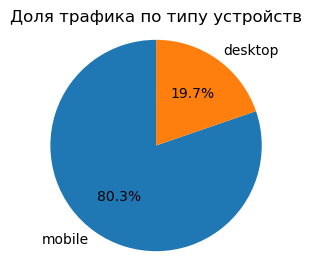

In [244]:
device_counts = df_temp['device_group'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('–î–æ–ª—è —Ç—Ä–∞—Ñ–∏–∫–∞ –ø–æ —Ç–∏–ø—É —É—Å—Ç—Ä–æ–π—Å—Ç–≤')
plt.axis('equal')
plt.show()

**–ú–æ–±–∏–ª—å–Ω—ã–π —Ç—Ä–∞—Ñ–∏–∫ ‚Äî –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π (‚âà80%)**, –∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Å–æ—Ü—Å–µ—Ç–µ–π –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø—Ä–∏—Ö–æ–¥—è—Ç –∏–º–µ–Ω–Ω–æ —Å –º–æ–±–∏–ª—å–Ω—ã—Ö —É—Å—Ç—Ä–æ–π—Å—Ç–≤. –≠—Ç–æ —Ö–æ—Ä–æ—à–æ —Å–æ—á–µ—Ç–∞–µ—Ç—Å—è —Å —Ç–µ–∫—É—â–µ–π –∞—É–¥–∏—Ç–æ—Ä–∏–µ–π.

2. –°–¥–µ–ª–∞–µ–º –≥—Ä–∞—Ñ–∏–∫ –ª—É—á—à–∏—Ö —Ä–µ–∫–ª–∞–º–Ω—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π, –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ CR

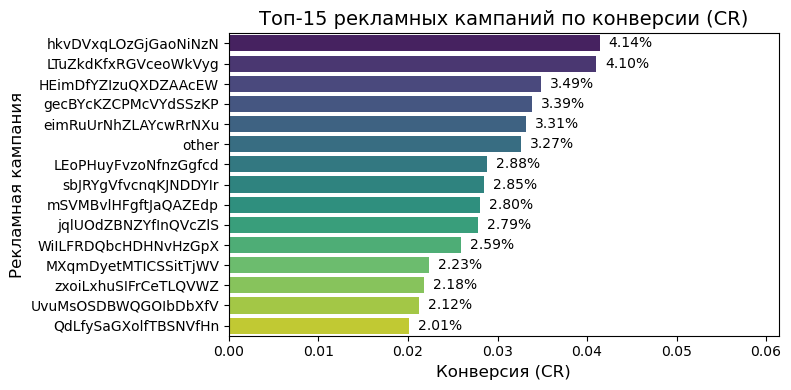

In [246]:
top_campaigns = filtered_cr_by_camp.sort_values('conversion_rate', ascending=False).head(15)

plt.figure(figsize=(8, 4))
barplot = sns.barplot(
    data=top_campaigns,
    x='conversion_rate',
    y='utm_campaign',
    hue='utm_campaign',
    dodge=False,
    legend=False,
    palette='viridis'
)

for i, row in enumerate(top_campaigns.itertuples()):
    plt.text(
        row.conversion_rate + 0.001,
        i,
        f"{row.conversion_rate * 100:.2f}%",
        va='center',
        fontsize=10
    )

plt.title('–¢–æ–ø-15 —Ä–µ–∫–ª–∞–º–Ω—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π –ø–æ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ (CR)', fontsize=14)
plt.xlabel('–ö–æ–Ω–≤–µ—Ä—Å–∏—è (CR)', fontsize=12)
plt.ylabel('–†–µ–∫–ª–∞–º–Ω–∞—è –∫–∞–º–ø–∞–Ω–∏—è', fontsize=12)
plt.xlim(0, top_campaigns['conversion_rate'].max() + 0.02)
plt.tight_layout()

plt.show()

**–£—Å–ø–µ—à–Ω—ã–µ –∫–∞–º–ø–∞–Ω–∏–∏ —É–∂–µ –¥–∞—é—Ç –≤—ã—Å–æ–∫–∏–π CR (4%+)**, –∞ –∑–Ω–∞—á–∏—Ç, –ø—Ä–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –∏ —Ç–∞—Ä–≥–µ—Ç–∏–Ω–≥–µ –≤ —Å–æ—Ü—Å–µ—Ç—è—Ö –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –Ω–µ —Ç–æ–ª—å–∫–æ –æ–±—ä—ë–º, –Ω–æ –∏ –∫–∞—á–µ—Å—Ç–≤–æ.

3. –°–¥–µ–ª–∞–µ–º –≥—Ä–∞—Ñ–∏–∫ –ª—É—á—à–∏—Ö –≥–æ—Ä–æ–¥–æ–≤ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è CR

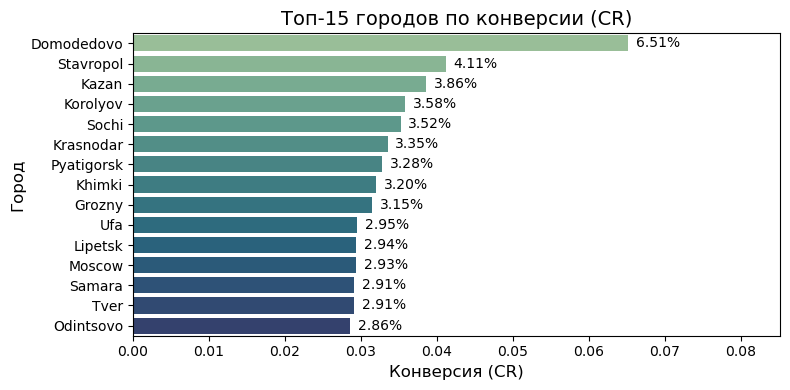

In [187]:
top_locations = filtered_cr_by_location.sort_values('conversion_rate', ascending=False).head(15)

# –ì—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(8, 4))
barplot = sns.barplot(
    data=top_locations,
    x='conversion_rate',
    y='geo_city',
    hue='geo_city',
    dodge=False,
    legend=False,
    palette='crest'
)

# –ü–æ–¥–ø–∏—Å–∏ –Ω–∞ –ø–æ–ª–æ—Å–∞—Ö
for i, row in enumerate(top_locations.itertuples()):
    plt.text(
        row.conversion_rate + 0.001,
        i,
        f"{row.conversion_rate * 100:.2f}%",
        va='center',
        fontsize=10
    )

# –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
plt.title('–¢–æ–ø-15 –≥–æ—Ä–æ–¥–æ–≤ –ø–æ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ (CR)', fontsize=14)
plt.xlabel('–ö–æ–Ω–≤–µ—Ä—Å–∏—è (CR)', fontsize=12)
plt.ylabel('–ì–æ—Ä–æ–¥', fontsize=12)
plt.xlim(0, top_locations['conversion_rate'].max() + 0.02)
plt.tight_layout()

plt.show()

**–†–µ–≥–∏–æ–Ω—ã —Å –≤—ã—Å–æ–∫–æ–π –∫–æ–Ω–≤–µ—Ä—Å–∏–µ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –î–æ–º–æ–¥–µ–¥–æ–≤–æ, –ö–∞–∑–∞–Ω—å)** ‚Äî —Ö–æ—Ä–æ—à–∏–π –æ—Ä–∏–µ–Ω—Ç–∏—Ä –¥–ª—è –ª–æ–∫–∞–ª—å–Ω–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∏–Ω–≥–∞ –≤ —Å–æ—Ü—Å–µ—Ç—è—Ö. –¢–∞–∫–∏–µ —Å–µ–≥–º–µ–Ω—Ç—ã –º–æ–∂–Ω–æ —É—Å–∏–ª–µ–Ω–Ω–æ –ø—Ä–æ—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å.

4. **–ê–Ω–∞–ª–∏—Ç–∏–∫–∞ —É–∂–µ –¥–∞—ë—Ç –ø–æ–Ω–∏–º–∞–Ω–∏–µ —É—Å–ø–µ—à–Ω—ã—Ö –∫—Ä–µ–∞—Ç–∏–≤–æ–≤ –∏ –æ—Ñ—Ñ–µ—Ä–æ–≤** ‚Äî –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏—Ö –≤ —Ä–µ–∫–ª–∞–º–Ω—ã—Ö —Ñ–æ—Ä–º–∞—Ç–∞—Ö —Å–æ—Ü—Å–µ—Ç–µ–π (–≤–∏–¥–µ–æ, –∫–∞—Ä—É—Å–µ–ª–∏, —Å—Ç–æ—Ä–∏—Å –∏ —Ç.–¥.).

###  **–ù–∞ —á—Ç–æ —Å—Ç–æ–∏—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –ø–µ—Ä–µ–¥ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ–º:**

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ CR –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤

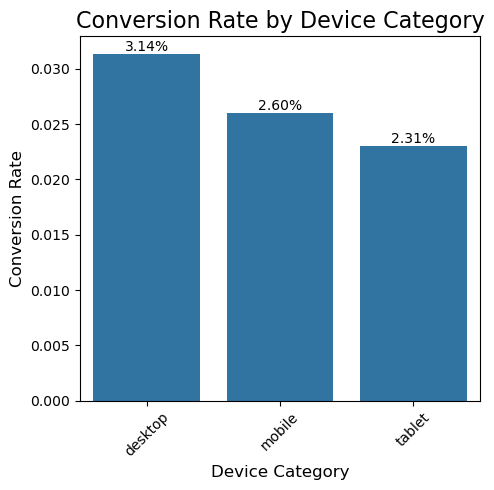

In [195]:
plt.figure(figsize=(5, 5))
barplot = sns.barplot(
    data=filtered_cr_by_device,
    x='device_category',
    y='conversion_rate'
)

barplot.bar_label(
    barplot.containers[0],
    labels=[f'{height*100:.2f}%' for height in [p.get_height() for p in barplot.patches]],
    fontsize=10
)

plt.title('Conversion Rate by Device Category', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **–ü—Ä–æ–≤–µ—Ä—å—Ç–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –º–æ–±–∏–ª—å–Ω–æ–π –≤–µ—Ä—Å–∏–∏ —Å–∞–π—Ç–∞** ‚Äî –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Å–æ—Ü—Å–µ—Ç–µ–π —á–∞—Å—Ç–æ –∑–∞—Ö–æ–¥—è—Ç –∏–º–µ–Ω–Ω–æ —Å —Ç–µ–ª–µ—Ñ–æ–Ω–∞, –∞ CR —Ç–∞–º –Ω–∏–∂–µ. –£–ª—É—á—à–µ–Ω–∏–µ –º–æ–±–∏–ª—å–Ω–æ–≥–æ UX –º–æ–∂–µ—Ç —Å–∏–ª—å–Ω–æ –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –∏—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏.

- **–û—Ç—Å–ª–µ–∂–∏–≤–∞–π—Ç–µ –Ω–µ —Ç–æ–ª—å–∫–æ —Ç—Ä–∞—Ñ–∏–∫, –Ω–æ –∏ CR –Ω–æ–≤—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π** ‚Äî –±–æ–ª—å—à–∏–µ –æ–±—ä—ë–º—ã –Ω–µ –≤—Å–µ–≥–¥–∞ –∑–Ω–∞—á–∞—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å. –ü—Ä–æ–¥–æ–ª–∂–∞–π—Ç–µ –æ–ø–∏—Ä–∞—Ç—å—Å—è –Ω–∞ CR, –∞ –Ω–µ —Ç–æ–ª—å–∫–æ –Ω–∞ –∫–ª–∏–∫–∏.

- **–ê/B —Ç–µ—Å—Ç–∏—Ä—É–π—Ç–µ –∫—Ä–µ–∞—Ç–∏–≤—ã –∏ –ø–æ—Å—ã–ª—ã** ‚Äî —Ç–æ, —á—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ –ø–æ–∏—Å–∫–µ –∏–ª–∏ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ, –Ω–µ –≤—Å–µ–≥–¥–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ —Å–æ—Ü—Å–µ—Ç—è—Ö.

###  –ò—Ç–æ–≥:
**–î–∞, —Å—Ç–æ–∏—Ç.** –ù–æ –¥–µ–ª–∞—Ç—å —ç—Ç–æ **—Ç–æ—á–µ—á–Ω–æ** ‚Äî —É—Å–∏–ª–∏–≤–∞—Ç—å —Ä–µ–∫–ª–∞–º–Ω—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –≤ —Å–æ—Ü—Å–µ—Ç—è—Ö —Å –æ–ø–æ—Ä–æ–π –Ω–∞:
- –Ω–∞–∏–±–æ–ª–µ–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–æ–Ω–Ω—ã–µ –∫–∞–º–ø–∞–Ω–∏–∏,
- –º–æ–±–∏–ª—å–Ω—É—é –∞—É–¥–∏—Ç–æ—Ä–∏—é,
- —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–µ –≥–æ—Ä–æ–¥–∞ –∏ –æ—Ñ—Ñ–µ—Ä—ã,
- –ø–æ—Å—Ç–æ—è–Ω–Ω—É—é –∞–Ω–∞–ª–∏—Ç–∏–∫—É CR –∏ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∑–∞—è–≤–∫–∏ (CPL).